In [1]:
from nafig.plots import na_text_barplot
import ehrapy as ep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from seaborn import color_palette
import matplotlib as mpl
mpl.rcParams["pdf.fonttype"] = 8
mpl.rcParams["ps.fonttype"] = 8

In [2]:
adata = ep.io.read_h5ad("../../../Notebooks/ehrapy_data/adata_pneumonia_unspecified_rest_annotated-1.h5ad")
adata

AnnData object with n_obs × n_vars = 277 × 254
    obs: ' Dexmedetomidine Hydrochloride Injection', '(4:1)Glucose and Sodium Chloride Injection', '0.9% Sodium Chloride Injection', '10% Calcium Gluconate Injection', '10% Chloral Hydrate Enemas', '10% Chloral Hydrate Syrup', '10% Glucose Injection', '10% Potassium Chloride Injection', '10% Potassium Chloride Oral Solution', '10% Sodium Chloride Injection', '20% Albumin Prepared From Human Plasma Injection', '20% Mannitol Injection', '20% Medium and Long Chain Fat Emulsion Injection', '25% Magnesium Sulfate Injection', '5% Amino Acidi Injection', '5% Calcium Chloride Injection', '5% Glucose Injection', '5% Glucose and Sodium Chloride Injection', '5% Sodium Bicarbonate Injection', '50% Glucose Injection', '6% Dextran 40 Glucose Injection', 'Aciclovir for Injection', 'Ademetionine  1,4-Butanedisulfonate for Injection', 'Adrenaline Hydrochlaride Injection', 'Alprostadil Injection', 'Ambroxol Hydrochloride Injection', 'Ambroxol Hydrochloride 

Some of the var names contain different statistics of one feature (e.g. `Systolic Pressure`). Let's leave only one of these columns

In [3]:
df = pd.DataFrame(adata.layers["original"], columns=adata.var_names, index=adata.obs_names)

feature_types = ["numerical" if var in adata.uns["numerical_columns"] else "categorical"
                 for var in adata.var_names]

unique_features = []  # Real columns from df that we want to keep
cleaned_types = []  # Subset of feature_types for kept columns
feature_names = []  # New cleaner names for the features

for i, col in enumerate(df.columns):
    if col.startswith("ehrapycat_") and (col.endswith("_1.0") or col.endswith("_1")):
        feature = col[len("ehrapycat_"): col.rfind("_")]
        
    elif col.startswith("ehrapycat_"):
        feature = col[len("ehrapycat_"):]
    else:
        feature = col
    
    feature_names.append(feature)
    unique_features.append(col)
    cleaned_types.append(feature_types[i])
        
df = df[unique_features]
df.columns = feature_names

unique_features = []
cleaned_types = []
feature_names = []

for i, col in enumerate(df.columns):
    if col[-3: ] in ["avg", "min", "max"]:
        feature = col[:-4]
        if feature not in feature_names:
            unique_features.append(col)
            feature_names.append(feature)
            cleaned_types.append(feature_types[i])
    else:
        unique_features.append(col)
        feature_names.append(col)
        cleaned_types.append(feature_types[i])

cleaned_types = np.array(cleaned_types)
        
df = df[unique_features]
df.columns = feature_names

In [4]:
df

,received_rest_0.0,received_rest,sputum_positive_bacteria_0.0,sputum_positive_bacteria,sputum_positive_fungi_0.0,sputum_positive_fungi,ethnicity_Han ethnic,ethnicity_Miao ethnic,ethnicity_Others,ethnicity_Tujia ethnic,...,Eosinophil Count,Serum icteric index,Temperature,Heart Rate,Respiratory Rate,Excrement,Diastolic Pressure,Systolic Pressure,C-Reactive Protein,Procalcitonin
9,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.04,0.0,36.000000,92.0,18.0,0.0,59.0,109.0,NaN,0.063
13270,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,36.000000,92.0,18.0,0.0,40.0,75.0,2.11,0.061
13298,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,36.900002,90.0,26.0,0.0,47.0,82.0,2.38,0.656
13761,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,36.799999,146.0,24.0,0.0,64.0,108.0,10.81,NaN


In [5]:
adata.uns["encoding_to_var"]

{'one_hot_encoding': array(['received_rest', 'sputum_positive_bacteria',
        'sputum_positive_fungi', 'ethnicity', 'received_antifungals',
        'received_catecholamines', 'received_antivirals',
        'Serum hemolytic index_max', 'Death', 'gender',
        'received_antibiotics', 'Serum hemolytic index_min', 'Lipase_min',
        'insurance', 'Lipase_max'], dtype=object)}

Remove reduntant categorical columns (e.g. the same columns, which is one-hot encoded)

In [6]:
encoded_cols = adata.uns["encoding_to_var"]["one_hot_encoding"]
encoded_cols

array(['received_rest', 'sputum_positive_bacteria',
       'sputum_positive_fungi', 'ethnicity', 'received_antifungals',
       'received_catecholamines', 'received_antivirals',
       'Serum hemolytic index_max', 'Death', 'gender',
       'received_antibiotics', 'Serum hemolytic index_min', 'Lipase_min',
       'insurance', 'Lipase_max'], dtype=object)

In [7]:
cols_to_take = []
cols_to_remove = []
new_cols_names = []

# Take columns with the same name as in `encoded_cols`
for col in encoded_cols:
    similar_df_cols = df.columns[df.columns.str.startswith(col)]
    
    if col in df.columns:
        cols_to_take.append(col)
        cols_to_remove.extend(similar_df_cols[similar_df_cols != col])
    else:
        cols_to_take.append(similar_df_cols[0])
        cols_to_remove.extend(similar_df_cols[1:])
        
    new_cols_names.append(col)

In [8]:
cols_to_take

['received_rest',
 'sputum_positive_bacteria',
 'sputum_positive_fungi',
 'ethnicity_Han ethnic',
 'received_antifungals',
 'received_catecholamines',
 'received_antivirals',
 'Serum hemolytic index_max_0.0',
 'Death',
 'gender_F',
 'received_antibiotics',
 'Serum hemolytic index_min_0.0',
 'Lipase_min_0.0',
 'insurance_Foundation',
 'Lipase_max_0.0']

In [9]:
cols_to_remove

['received_rest_0.0',
 'sputum_positive_bacteria_0.0',
 'sputum_positive_fungi_0.0',
 'ethnicity_Miao ethnic',
 'ethnicity_Others',
 'ethnicity_Tujia ethnic',
 'received_antifungals_0.0',
 'received_catecholamines_0.0',
 'received_antivirals_0.0',
 'Death_0',
 'gender_M',
 'received_antibiotics_0.0',
 'insurance_Medical Insurance',
 'insurance_Premiums Pay',
 'insurance_Self Pay',
 'insurance_the General Card']

In [10]:
new_cols_names

['received_rest',
 'sputum_positive_bacteria',
 'sputum_positive_fungi',
 'ethnicity',
 'received_antifungals',
 'received_catecholamines',
 'received_antivirals',
 'Serum hemolytic index_max',
 'Death',
 'gender',
 'received_antibiotics',
 'Serum hemolytic index_min',
 'Lipase_min',
 'insurance',
 'Lipase_max']

In [11]:
cleaned_types = cleaned_types[~df.columns.isin(cols_to_remove)]
df = df.drop(cols_to_remove, axis=1)
df = df.rename(columns=dict(zip(cols_to_take, new_cols_names)))

In [12]:
len(cleaned_types)

In [13]:
len(df.columns)

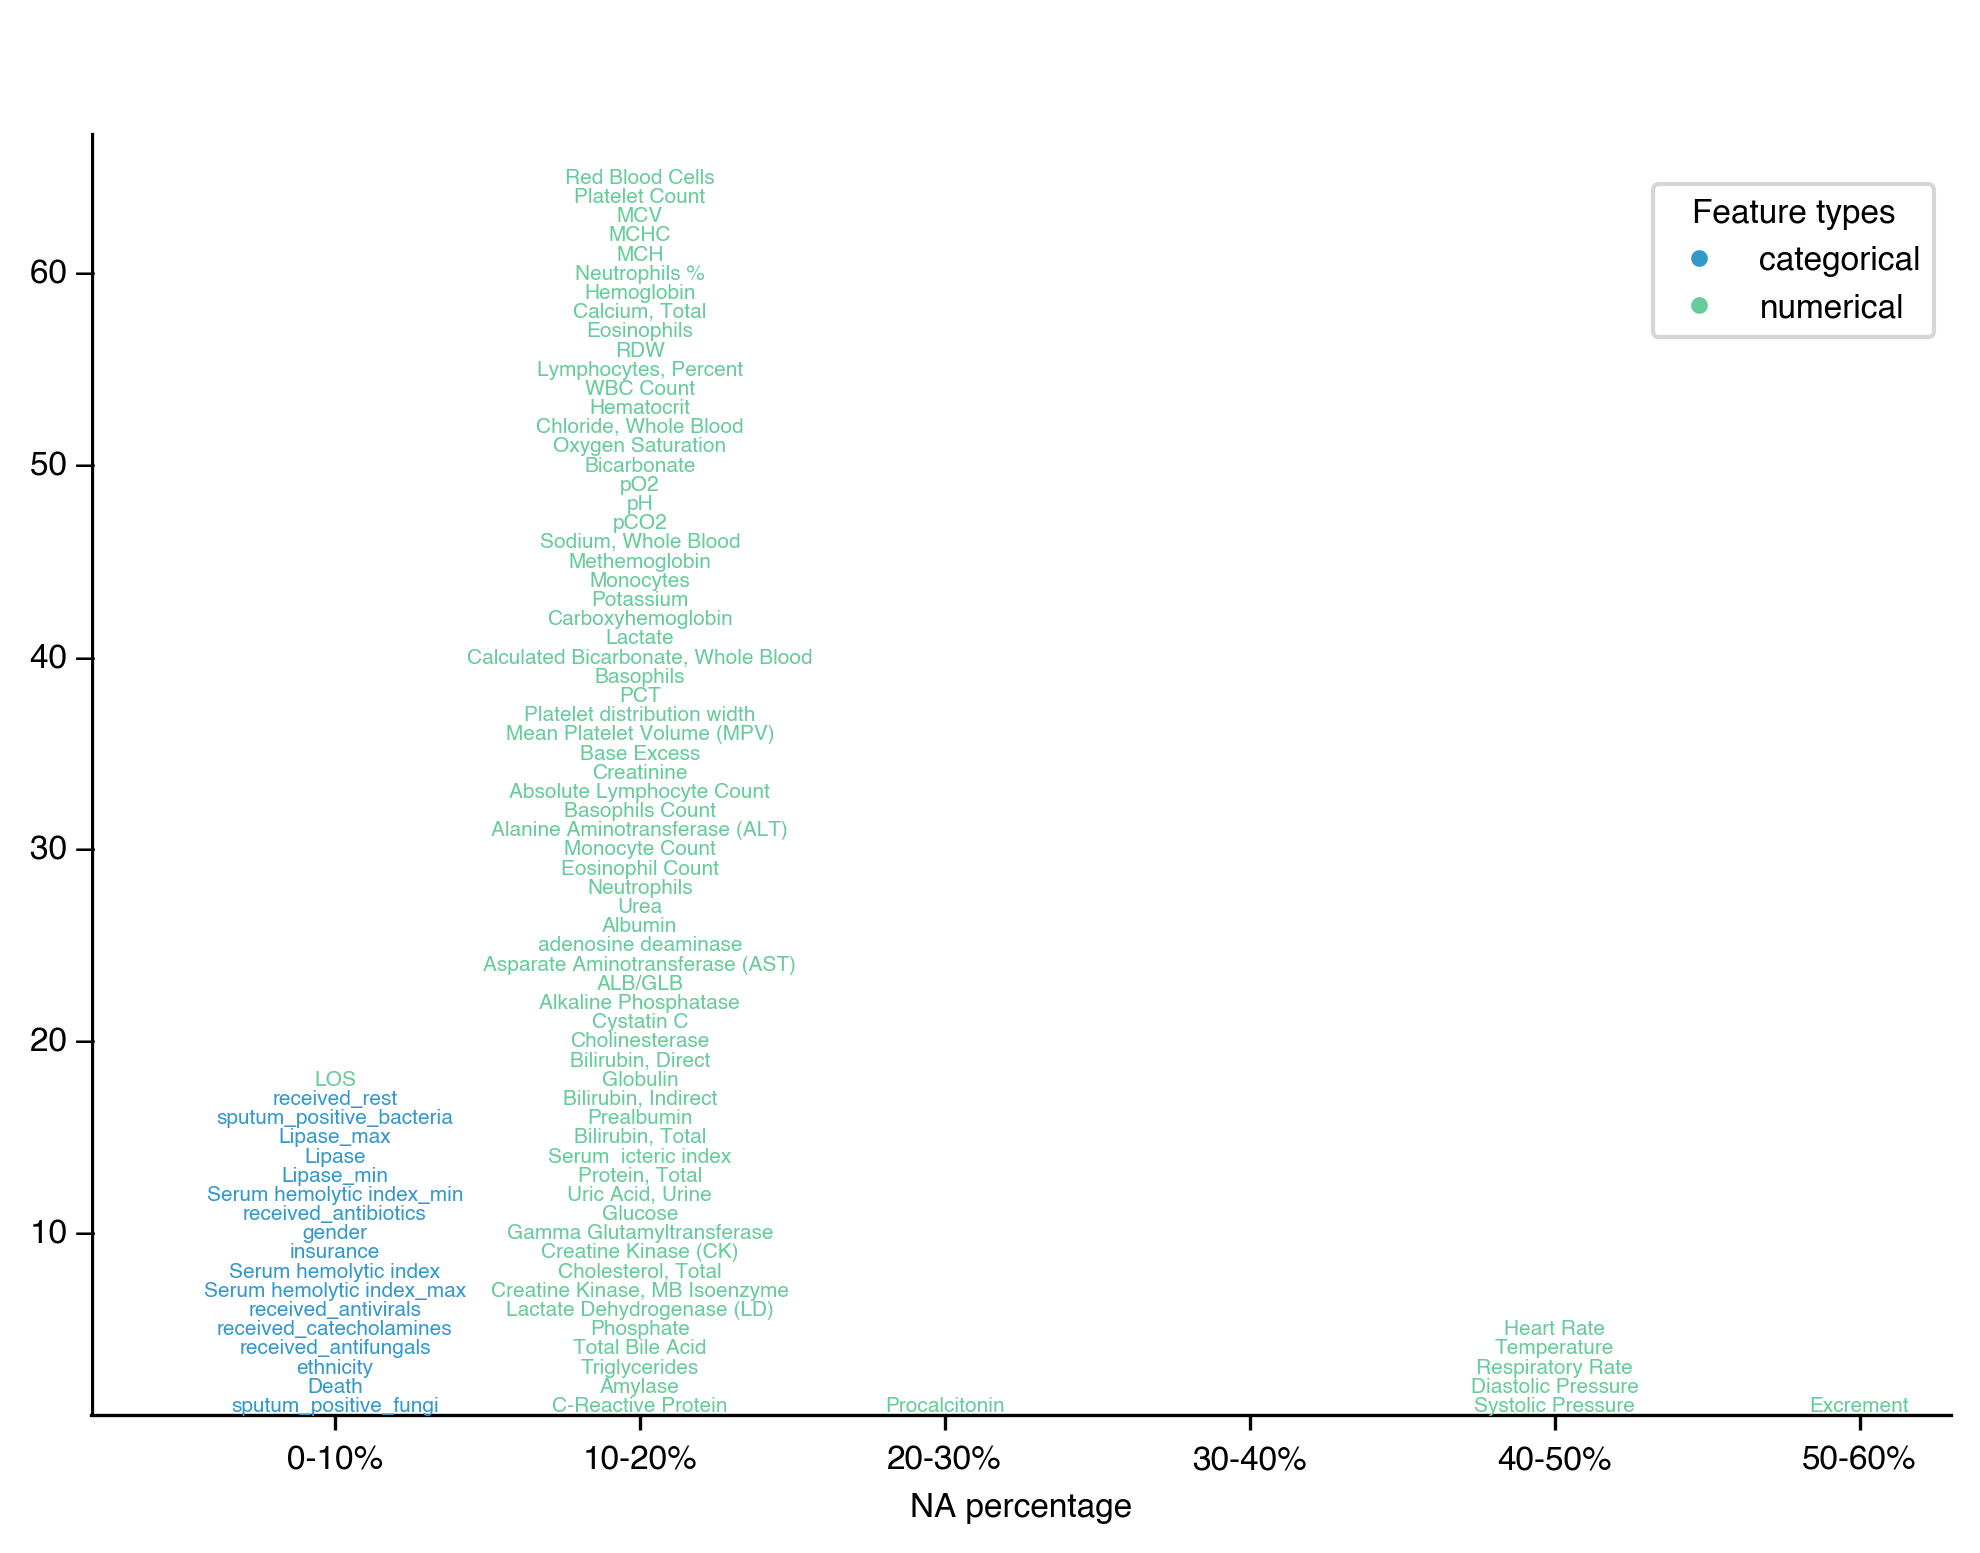

In [14]:
with mpl.rc_context({'font.family': 'Helvetica', 'font.size': 8}):
    ax = na_text_barplot(
        df,
        hue=cleaned_types,
        num_bins=10,
        line_height=0.9,
        fig_width=8,
        remove_empty_bins="right",
        font_size=5,
        legend_title="Feature types",
        dpi=300,
        palette=color_palette(["#3399CC", "#66CC99"]),
        legend_title_fontsize=8,
        legend_fontsize=8,
        xlabel_fontsize=8
    )

    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1, 0.9))  # Put legend in the right top corner
    ax.plot([-0.8, -0.8], [0, 60], 'k-')

    ax.set_xlim(-0.8, 5.3)
    plt.savefig("sup_fig_2_helvetica.pdf", bbox_inches="tight")

In [15]:
ax = na_text_barplot(
    df,
    hue=cleaned_types,
    num_bins=10,
    line_height=1.5,
    fig_width=16,
    remove_empty_bins="right",
    font_size=8,
    legend_title="Feature types",
    dpi=300,
    palette=color_palette(["#3399CC", "#66CC99"]),
    legend_title_fontsize=15,
    legend_fontsize=14,
    xlabel_fontsize=14
)

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1.55))  # Put legend in the right top corner

ax.set_xlim(-0.8, 5.3)
plt.savefig("sup_fig_2.png", bbox_inches="tight")